In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [83]:
pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [84]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [85]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [48]:
X_train[0].shape

(28, 28)

In [49]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

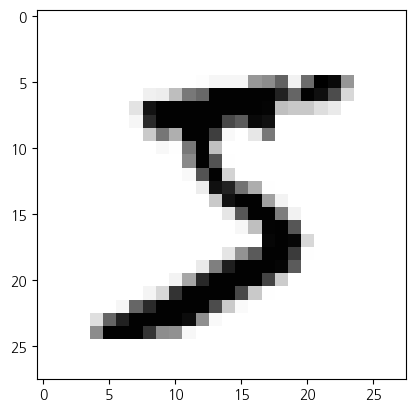

In [69]:
plt.imshow(X_train[0], cmap='Grays')
plt.show()

In [71]:
pd.options.display.max_columns =None 

In [72]:
pd.DataFrame(X_train[0])

ValueError: Must pass 2-d input. shape=(28, 28, 1)

In [50]:
X_train.shape

(60000, 28, 28)

In [51]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [52]:
X_train.shape

(60000, 784)

In [53]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

In [54]:
X_train =  X_train/255
X_test = X_test/255

* 종속변수 one_hot_encoding

In [55]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [56]:
y_train.shape

(60000,)

In [57]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [58]:
len(np.unique(y_train))

10

In [59]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [60]:
y_train.shape

(60000, 10)

# DNN 훈련 및 예측
* 이미지분석시 은닉층 노드: 작은것 =>큰것 => 작은 것

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [61]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(512, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,162 (5.56 MB)

 Trainable params: 1,457,162 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7383 - loss: 0.9043 - val_accuracy: 0.9444 - val_loss: 0.1857
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9544 - loss: 0.1579 - val_accuracy: 0.9631 - val_loss: 0.1268
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9748 - loss: 0.0889 - val_accuracy: 0.9685 - val_loss: 0.1014
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9836 - loss: 0.0593 - val_accuracy: 0.9697 - val_loss: 0.1041
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9884 - loss: 0.0394 - val_accuracy: 0.9731 - val_loss: 0.0954
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9924 - loss: 0.0271 - val_accuracy: 0.9754 - val_loss: 0.0875
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9959 - loss: 0.0169 - val_accuracy: 0.9759 - val_loss: 0.0956
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9962 - loss: 0.0140 - val_accuracy: 0.9752 - v

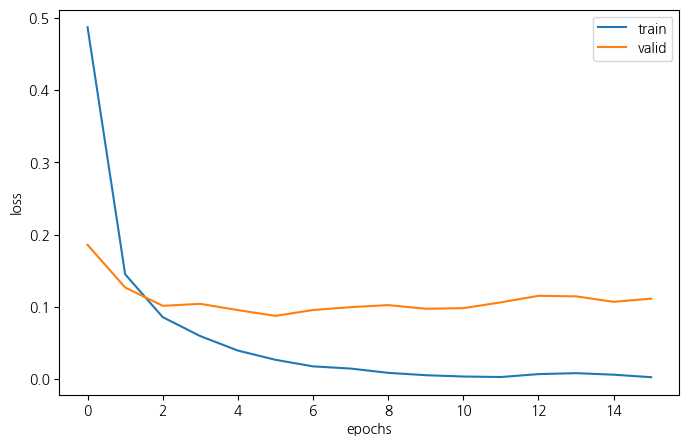

In [62]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model_path = "./model/MNIST_MLP.keras"
checkpoint = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, validation_split=0.25,
                   epochs=50,
                   batch_size=1000,
                   callbacks=[checkpoint, early_stop])
print("test 정확도: ", model.evaluate(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "valid"])
plt.show()

# CNN합성곱 신경망으로 이미지 분석하기

In [63]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# CNN을 위한 데이터 전처리 3차원=>4차원
(행(전체 데이터 개수), 이미지사이즈(행, 열),색레이어수(흑백=1, 컬러=3 )

In [64]:
X_train.shape

(60000, 28, 28)

In [65]:
X_train.dtype

dtype('uint8')

In [66]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")/ 255
X_train.shape

(60000, 28, 28, 1)

In [67]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")/ 255
X_test.shape

(10000, 28, 28, 1)

In [68]:
y_train = to_categorical(y_train, 10)
t_test = to_categorical(y_test, 10)

# CNN 합성곱 네트워크를 위한 layers
* Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [75]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [76]:
X_train.shape

(60000, 28, 28, 1)

In [80]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) # 과적합 방지
model.add(Flatten()) # DNN 연산을 위해 모든 데이터를 1차원으로 변환
model.add(Dense(128,  activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,258 (4.61 MB)

 Trainable params: 1,209,258 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model_path = "./model/MNIST_CNN.keras"
checkpoint = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, validation_split=0.25,
                   epochs=50,
                   batch_size=1000,
                   callbacks=[checkpoint, early_stop])
print("test 정확도: ", model.evaluate(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "valid"])
plt.show()

Epoch 1/50


2025-05-19 15:14:01.193492: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.6 = (f32[1000,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1000,1,28,28]{3,2,1,0} %bitcast.7088, f32[32,1,3,3]{3,2,1,0} %bitcast.7095, f32[32]{0} %bitcast.7551), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_8_1/conv2d_4_1/convolution" source_file="/home/jihyun/miniforge3/envs/fintech/lib/python3.9/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-19 15:14:01.201244: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitt

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.4853 - loss: 1.4309

2025-05-19 15:14:16.171144: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=0} for conv %cudnn-conv-bias-activation.6 = (f32[1000,32,26,26]{3,2,1,0}, u8[0]{0}) custom-call(f32[1000,1,28,28]{3,2,1,0} %bitcast.550, f32[32,1,3,3]{3,2,1,0} %bitcast.557, f32[32]{0} %bitcast.559), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_8_1/conv2d_4_1/convolution" source_file="/home/jihyun/miniforge3/envs/fintech/lib/python3.9/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-05-19 15:14:16.180434: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted 

45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 262ms/step - accuracy: 0.4897 - loss: 1.4200 - val_accuracy: 0.9339 - val_loss: 0.2196
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9009 - loss: 0.3359 - val_accuracy: 0.9669 - val_loss: 0.1103
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.9487 - loss: 0.1793 - val_accuracy: 0.9735 - val_loss: 0.0868
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.9611 - loss: 0.1357 - val_accuracy: 0.9783 - val_loss: 0.0725
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.9697 - loss: 0.1070 - val_accuracy: 0.9805 - val_loss: 0.0637
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.9765 - loss: 0.0851 - val_accuracy: 0.9835 - val_loss: 0.0594
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.9786 - loss: 0.0736 - val_accuracy: 0.9833 - val_loss: 0.0579
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.9828 - loss: 0.0631 - val_accuracy: 0.9856 -

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)